In [383]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.python.ops.losses.losses_impl import mean_squared_error

In [384]:
users = pd.read_csv('streamworks_user_data.csv')
print(users.info())
print(users.describe())
print(users.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1498 non-null   float64
 1   age                   1497 non-null   float64
 2   gender                1499 non-null   object 
 3   signup_date           1498 non-null   object 
 4   last_active_date      1498 non-null   object 
 5   country               1497 non-null   object 
 6   subscription_type     1497 non-null   object 
 7   average_watch_hours   1496 non-null   float64
 8   mobile_app_usage_pct  1498 non-null   float64
 9   complaints_raised     1497 non-null   float64
 10  received_promotions   1497 non-null   object 
 11  referred_by_friend    1497 non-null   object 
 12  is_churned            1499 non-null   float64
 13  monthly_fee           1355 non-null   float64
dtypes: float64(7), object(7)
memory usage: 164.2+ KB
None
           user_id

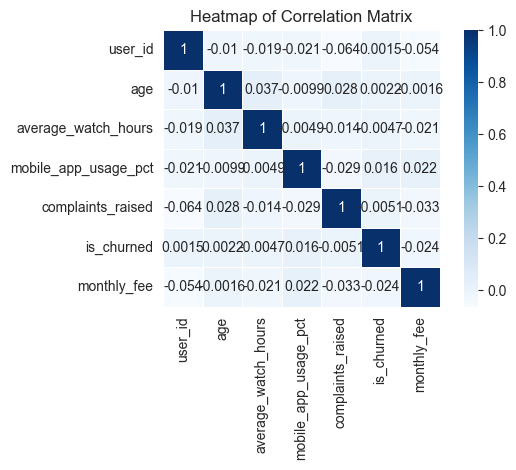

In [385]:
corr = users.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='Blues', linewidths=.5, square=True)
plt.title('Heatmap of Correlation Matrix')
plt.tight_layout()
plt.show()

In [386]:
print(users.isnull().sum())

user_id                   2
age                       3
gender                    1
signup_date               2
last_active_date          2
country                   3
subscription_type         3
average_watch_hours       4
mobile_app_usage_pct      2
complaints_raised         3
received_promotions       3
referred_by_friend        3
is_churned                1
monthly_fee             145
dtype: int64


In [387]:
print(users['gender'].unique())

['Other' 'Male' 'Female' nan]


In [388]:
users['gender'] = users['gender'].replace(np.nan, 'Other')
print(users['gender'].unique())

['Other' 'Male' 'Female']


In [389]:
print(users['referred_by_friend'].unique())

['No' 'Yes' nan]


In [390]:
users['referred_by_friend'] = users['referred_by_friend'].replace(np.nan, 'No')
print(users['referred_by_friend'].unique())

['No' 'Yes']


In [391]:
print(users['received_promotions'].unique())

['No' 'Yes' nan]


In [392]:
users['received_promotions'] = users['received_promotions'].replace(np.nan, 'No')
print(users['received_promotions'].unique())

['No' 'Yes']


In [393]:
users = users.dropna()
print(users.isnull().sum())

user_id                 0
age                     0
gender                  0
signup_date             0
last_active_date        0
country                 0
subscription_type       0
average_watch_hours     0
mobile_app_usage_pct    0
complaints_raised       0
received_promotions     0
referred_by_friend      0
is_churned              0
monthly_fee             0
dtype: int64


In [394]:
print(users['monthly_fee'].unique())

[10.99  5.99 13.99  9.99 14.99  6.99]


In [395]:
print(users.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1335 non-null   float64
 1   age                   1335 non-null   float64
 2   gender                1335 non-null   object 
 3   signup_date           1335 non-null   object 
 4   last_active_date      1335 non-null   object 
 5   country               1335 non-null   object 
 6   subscription_type     1335 non-null   object 
 7   average_watch_hours   1335 non-null   float64
 8   mobile_app_usage_pct  1335 non-null   float64
 9   complaints_raised     1335 non-null   float64
 10  received_promotions   1335 non-null   object 
 11  referred_by_friend    1335 non-null   object 
 12  is_churned            1335 non-null   float64
 13  monthly_fee           1335 non-null   float64
dtypes: float64(7), object(7)
memory usage: 156.4+ KB
None


In [396]:
users['signup_date'] = pd.to_datetime(users['signup_date'], errors='coerce')
users['last_active_date'] = pd.to_datetime(users['last_active_date'], errors='coerce')
print(users.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user_id               1335 non-null   float64       
 1   age                   1335 non-null   float64       
 2   gender                1335 non-null   object        
 3   signup_date           1335 non-null   datetime64[ns]
 4   last_active_date      1335 non-null   datetime64[ns]
 5   country               1335 non-null   object        
 6   subscription_type     1335 non-null   object        
 7   average_watch_hours   1335 non-null   float64       
 8   mobile_app_usage_pct  1335 non-null   float64       
 9   complaints_raised     1335 non-null   float64       
 10  received_promotions   1335 non-null   object        
 11  referred_by_friend    1335 non-null   object        
 12  is_churned            1335 non-null   float64       
 13  monthly_fee       

In [397]:
users['tenure_days'] = users['last_active_date'] - users['signup_date']
users['is_loyal'] = users['tenure_days'].apply(lambda x: 'True' if x > pd.Timedelta(days=180) else 'False')
print(users.isnull().sum())

user_id                 0
age                     0
gender                  0
signup_date             0
last_active_date        0
country                 0
subscription_type       0
average_watch_hours     0
mobile_app_usage_pct    0
complaints_raised       0
received_promotions     0
referred_by_friend      0
is_churned              0
monthly_fee             0
tenure_days             0
is_loyal                0
dtype: int64


In [398]:
print(users['is_loyal'].unique())

['False' 'True']


In [399]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [400]:
users = pd.get_dummies(users, columns=['subscription_type'])

users['referred_by_friend'] = users['referred_by_friend'].map({'Yes': 1, 'No': 0})
users['received_promotions'] = users['received_promotions'].map({'Yes': 1, 'No': 0})
print(users.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1499
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   user_id                     1335 non-null   float64        
 1   age                         1335 non-null   float64        
 2   gender                      1335 non-null   object         
 3   signup_date                 1335 non-null   datetime64[ns] 
 4   last_active_date            1335 non-null   datetime64[ns] 
 5   country                     1335 non-null   object         
 6   average_watch_hours         1335 non-null   float64        
 7   mobile_app_usage_pct        1335 non-null   float64        
 8   complaints_raised           1335 non-null   float64        
 9   received_promotions         1335 non-null   int64          
 10  referred_by_friend          1335 non-null   int64          
 11  is_churned                  1335 non-null  

In [401]:
users['churn_encoded'] = LabelEncoder().fit_transform(users['is_churned'])
print(users['churn_encoded'].unique())

[1 0]


In [402]:
users['is_loyal'] = LabelEncoder().fit_transform(users['is_loyal'])
print(users['is_loyal'].unique())

[0 1]


In [403]:
users['tenure_days'] = users['tenure_days'].astype(int)
print(users['tenure_days'].unique())

[ 13737600000000000  77155200000000000  91324800000000000
  57715200000000000  61776000000000000  64713600000000000
  75945600000000000  80870400000000000  31708800000000000
  15379200000000000  38016000000000000 110678400000000000
  90633600000000000  65318400000000000  55728000000000000
  34473600000000000  11491200000000000  91065600000000000
  67996800000000000   7430400000000000    518400000000000
  34300800000000000  38361600000000000  24192000000000000
  15552000000000000  57283200000000000  93744000000000000
  73180800000000000  13478400000000000  37929600000000000
  48988800000000000  57369600000000000  50803200000000000
  65750400000000000  49507200000000000  80956800000000000
 100051200000000000  43632000000000000  84153600000000000
  48470400000000000   6220800000000000  88819200000000000
  33004800000000000  22636800000000000  77932800000000000
  84067200000000000  20563200000000000  11664000000000000
  46137600000000000  17193600000000000  61171200000000000
 -127008000000

Task 4: Statistical Analysis

In [404]:
from scipy.stats import chi2_contingency


In [405]:
contigency = pd.crosstab(users['churn_encoded'], users['gender'])
chi2, p, dof, expected = chi2_contingency(contigency)
print("Chi Square Statistics: ", chi2)
print("p-Value: ", p)
print("Degrees of freedom: ", dof)
print("Expected: ", expected)

Chi Square Statistics:  2.772111914712086
p-Value:  0.2500596080460708
Degrees of freedom:  2
Expected:  [[353.1835206  329.38202247 342.43445693]
 [106.8164794   99.61797753 103.56554307]]


In [406]:
contigency_promotions = pd.crosstab(users['churn_encoded'], users['received_promotions'])
chi2, p, dof, expected = chi2_contingency(contigency_promotions)
print("Chi Square Statistics: ", chi2)
print("p-Value: ", p)
print("Degrees of freedom: ", dof)
print("Expected: ", expected)

Chi Square Statistics:  4.802881212486573
p-Value:  0.02841218368300754
Degrees of freedom:  1
Expected:  [[524.40074906 500.59925094]
 [158.59925094 151.40074906]]


In [407]:
contigency_refferal = pd.crosstab(users['churn_encoded'], users['referred_by_friend'])
chi2, p, dof, expected = chi2_contingency(contigency_refferal)
print("Chi Square Statistics: ", chi2)
print("p-Value: ", p)
print("Degrees of freedom: ", dof)
print("Expected: ", expected)

Chi Square Statistics:  0.5133127270654233
p-Value:  0.47370830761446625
Degrees of freedom:  1
Expected:  [[519.02621723 505.97378277]
 [156.97378277 153.02621723]]


In [408]:
from scipy.stats import ttest_ind

churned = users.loc[users['churn_encoded'] == 1, 'average_watch_hours']
retained = users.loc[users['churn_encoded'] == 0, 'average_watch_hours']


t_stat, p_value = ttest_ind(churned, retained)
print("t-Statistic: ", t_stat)
print("p-Value: ", p_value)

t-Statistic:  -0.6399016668708671
p-Value:  0.5223464930629889


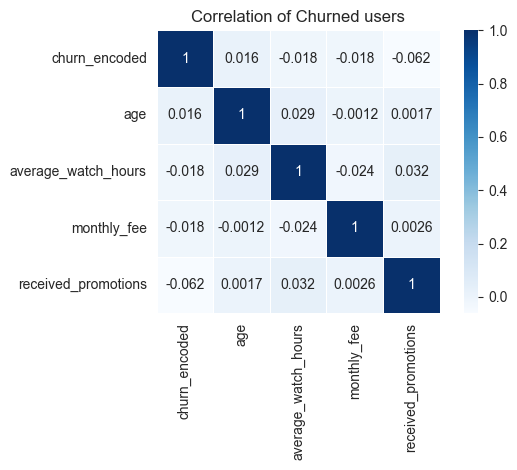

In [409]:
corr = users[['churn_encoded', 'age', 'average_watch_hours', 'monthly_fee', 'received_promotions']].corr()
sns.heatmap(corr, annot=True, cmap='Blues', linewidths=.5, square=True)
plt.title("Correlation of Churned users")
plt.tight_layout()
plt.show()


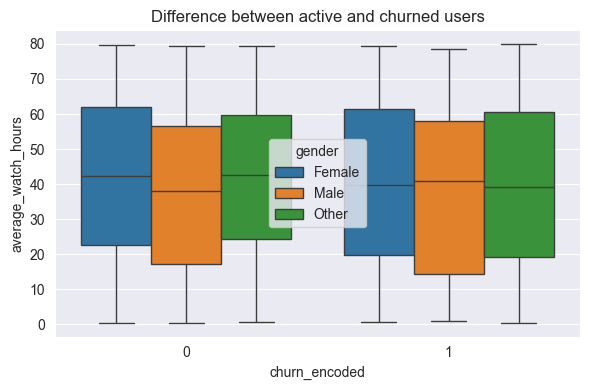

In [410]:
plt.figure(figsize=(6,4))
sns.boxplot(data=users, x='churn_encoded', y='average_watch_hours', hue='gender')
plt.title("Difference between active and churned users")
plt.tight_layout()
plt.show()
#1 is churned

Task 5: Predictive modelling

In [411]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression

In [412]:
X = users[['referred_by_friend', 'age', 'received_promotions', 'average_watch_hours', 'monthly_fee', 'mobile_app_usage_pct']]
y = users['churn_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [413]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [414]:
log_model = LogisticRegression(random_state=42, class_weight='balanced')
log_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [415]:
y_pred = log_model.predict(X_test)
y_pred_proba = log_model.predict_proba(X_test)[:, 1]

In [416]:
test_users = np.array([
    [1, 35, 1, 15, 14.99, 70],
    [0, 20, 0, 2, 6.99, 15],
    [0, 50, 1, 13, 9.99, 50],
    [0, 50, 0, 13, 9.99, 50],
    [0, 35, 1, 13, 14.99, 50],
    [0, 20, 1, 2, 6.99, 10]
])
print("Predictions on realistic profiles: ")
for i, user_scaled in enumerate(test_users):
    pred = log_model.predict([user_scaled])[0]
    proba = log_model.predict_proba([user_scaled])[0][1]

    print(f"User {i+1}:")
    print(f"  → Predicted Status: {'Churn' if pred == 1 else 'Retain'}")
    print(f"  → Churn Probability: {proba:.3f}")
    print("")

Predictions on realistic profiles: 
User 1:
  → Predicted Status: Churn
  → Churn Probability: 0.976

User 2:
  → Predicted Status: Churn
  → Churn Probability: 0.834

User 3:
  → Predicted Status: Churn
  → Churn Probability: 0.989

User 4:
  → Predicted Status: Churn
  → Churn Probability: 0.990

User 5:
  → Predicted Status: Churn
  → Churn Probability: 0.963

User 6:
  → Predicted Status: Churn
  → Churn Probability: 0.793



In [417]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, r2_score


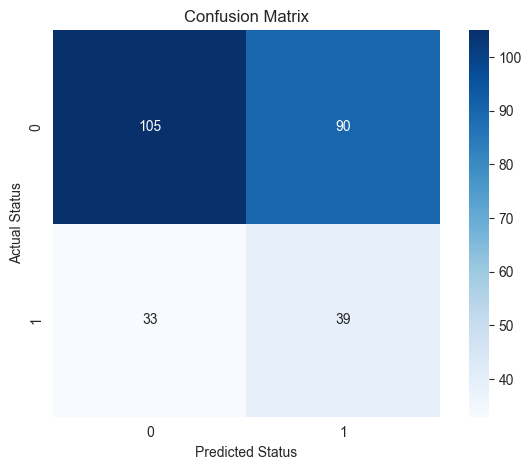

In [418]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', square=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Status")
plt.ylabel("Actual Status")

plt.tight_layout()
plt.show()

In [419]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.3f}")
print("\nClassification Report: ")
print(classification_report(y_test, y_pred, zero_division=0)) 

Model Accuracy: 0.539

Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.54      0.63       195
           1       0.30      0.54      0.39        72

    accuracy                           0.54       267
   macro avg       0.53      0.54      0.51       267
weighted avg       0.64      0.54      0.57       267



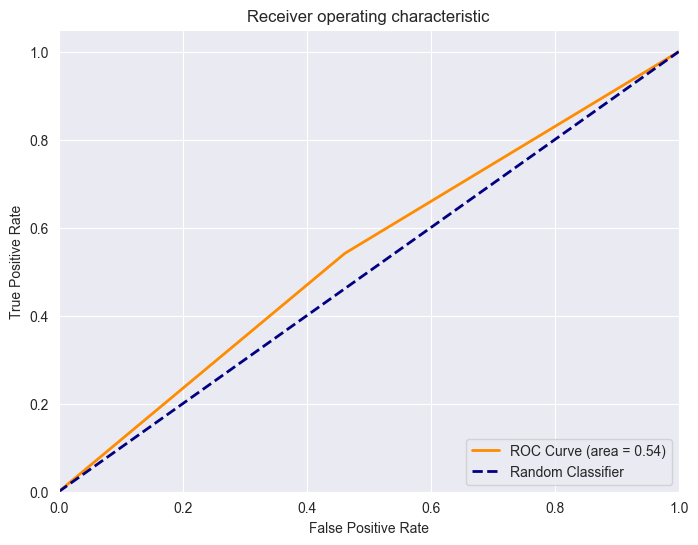

In [420]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0,1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [421]:
features = ['age', 'mobile_app_usage_pct']
X = users[features]
y = users['average_watch_hours']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
# continuous = ['mobile_app_usage_pct', 'tenure_days']
X_train[features] = scaler.fit_transform(X_train[features])
X_test[features] = scaler.transform(X_test[features])

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Linear Regression Results:")
print(f"R^2 Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"Intercept: {lr_model.intercept_:.2f}")
print("\nFeature Coefficients:")
for feature, coef in zip(features, lr_model.coef_):
    print(f'{feature}: {coef:8.2f}')

Linear Regression Results:
R^2 Score: -0.002
RMSE: 22.970
Intercept: 40.20

Feature Coefficients:
age:     0.21
mobile_app_usage_pct:     0.38


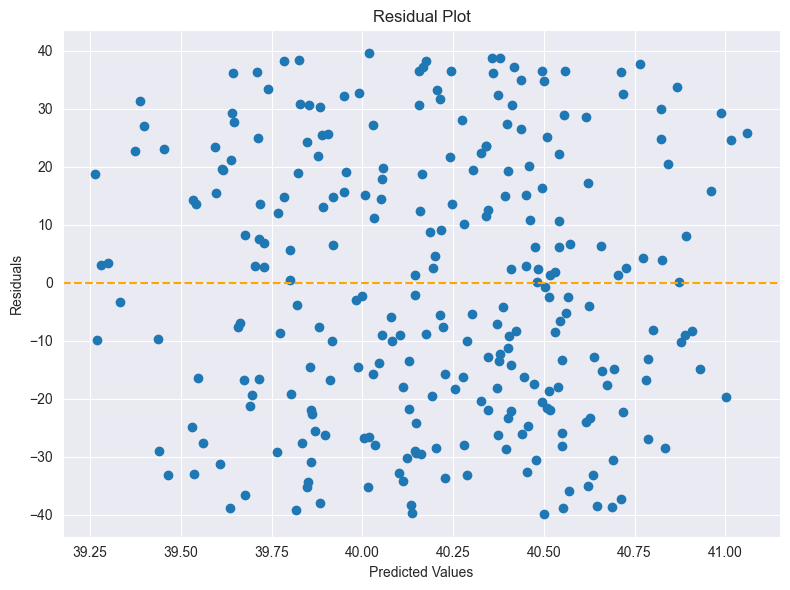

In [422]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, linestyle='--', color='orange')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.tight_layout()
plt.show()